In [69]:
import pandas as pd

df = pd.read_csv("sales_dataset.csv")
df.head()


,marketing_budget(thousands),actual_sales(millions)
0,187.86,12.14
1,138.13,12.33
2,177.89,8.41
3,181.13,8.90
4,151.50,12.57


In [70]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marketing_budget(thousands)  222 non-null    float64
 1   actual_sales(millions)       222 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [71]:
df.describe()


,marketing_budget(thousands),actual_sales(millions)
count,222.000000,222.000000
mean,257.992883,16.083198
std,78.439312,4.638950
min,101.910000,8.010000
25%,189.585000,12.445000
50%,262.485000,15.560000
75%,327.787500,19.310000
max,396.880000,25.980000


In [72]:
# Check missing values
df.isnull().sum()
# Drop missing values if any
df = df.dropna()


In [73]:
# Ensure numeric data
df['marketing_budget(thousands)'] = pd.to_numeric(
    df['marketing_budget(thousands)'], errors='coerce'
)

df['actual_sales(millions)'] = pd.to_numeric(
    df['actual_sales(millions)'], errors='coerce'
)


In [74]:
correlation = df['marketing_budget(thousands)'].corr(
    df['actual_sales(millions)']
)

correlation


np.float64(0.836701522292105)

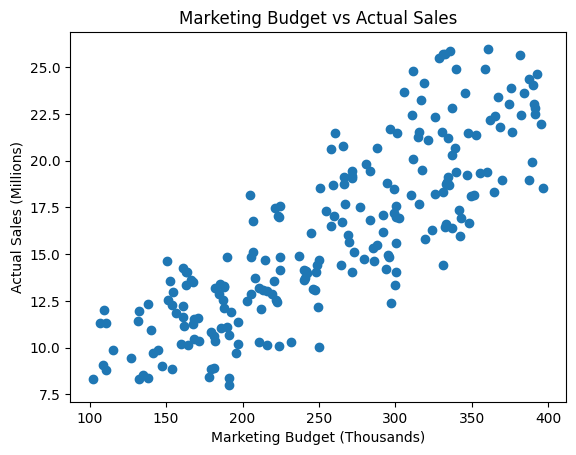

In [75]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['marketing_budget(thousands)'], df['actual_sales(millions)'])
plt.xlabel("Marketing Budget (Thousands)")
plt.ylabel("Actual Sales (Millions)")
plt.title("Marketing Budget vs Actual Sales")
plt.show()


In [76]:
df[['marketing_budget(thousands)', 'actual_sales(millions)']].corr()


,marketing_budget(thousands),actual_sales(millions)
marketing_budget(thousands),1.000000,0.836702
actual_sales(millions),0.836702,1.000000


In [77]:
import statsmodels.api as sm

X = df['marketing_budget(thousands)']
X = sm.add_constant(X)

Y = df['actual_sales(millions)']

model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_sales(millions)   R-squared:                       0.700
Model:                                OLS   Adj. R-squared:                  0.699
Method:                     Least Squares   F-statistic:                     513.5
Date:                    Mon, 02 Feb 2026   Prob (F-statistic):           1.90e-59
Time:                            12:13:47   Log-Likelihood:                -521.49
No. Observations:                     222   AIC:                             1047.
Df Residuals:                         220   BIC:                             1054.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.3169      0.589      5.634      0.000       2.157       4.477
marketing_budget(thousands)     0.0495      0.002     22.661      0.000       0.045       0.054
==============================================================================
Omnibus:                        3.499   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.062
Skew:                           0.199   Prob(JB):                        0.216
Kurtosis:                       2.586   Cond. No.                         929.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
import numpy as np

np.random.seed(0)

# Simulated data
marketing_budget = np.random.randint(50, 300, 50)
seasonal_demand = np.random.randint(1, 5, 50)   # Confounder
sales = marketing_budget * 0.4 + seasonal_demand * 20 + np.random.randn(50) * 10

simulated_df = pd.DataFrame({
    "marketing_budget": marketing_budget,
    "seasonal_demand": seasonal_demand,
    "sales": sales
})

# Correlation matrix
simulated_df.corr()


,marketing_budget,seasonal_demand,sales
marketing_budget,1.000000,0.058856,0.808845
seasonal_demand,0.058856,1.000000,0.598353
sales,0.808845,0.598353,1.000000
